In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
import sympy as sym


from FEM1D import FEM1_1D as fem
import FEM1D

Linear ($k=1$) Finite Element Method solver for the 1D Poisson problem:

$-u''=f \quad \in \Omega=(a,b)^2$

$u(a)=g(a)$ and $u(b)=g(b)$

for $g$ a given function.

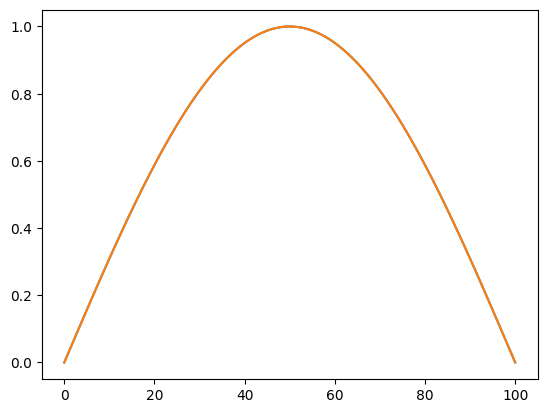

4.1126903210453314e-05


In [21]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)
exact = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 1

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
A, F = method.FEM_POISSON()

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Evaluate exact solution at grid nodes
x = np.linspace(omega[0],omega[1],N+1)
U = exact(x)

# Plot solutions
plt.plot(Uh)
plt.plot(U)
plt.show()


# compute discrete max norm error
print(max(abs(U-Uh)))

Point 1

Function computing $H^1$-norm error and and test convergence this time for $\| u - u_h \|_{H^1(a,b)}$.

The funtion is FEM1_H1 in FEM1D script.

In [5]:
t = sym.var('t')
my_f = sym.sin(t)

h1_err = method.FEM1_H1(Uh, my_f, t)
print(h1_err)

1.0626033084974295e-08


As it is possible to see from the plot above, the tru solution and the approximate with FEM one are overlapping and this is also highlighted by the H1 error norm.

In [7]:
# Initialise error vector
k_array = np.zeros(6)
NN = np.array([50,75,100,125,150,175])
NN_inv = [50**(-2),75**(-2),100**(-2),125**(-2),150**(-2),175**(-2)] # stuff for new version of python problem



# experiments loop
for i, N in enumerate(NN):

    n_qpoints = 10

    # call function computing FEM system
    method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
    A, F = method.FEM_POISSON()

    # solve
    Uh = sp.linalg.spsolve(A,F)

    k_array[i] = method.FEM1_H1(Uh, my_f, t)

C:\Users\matte\AppData\Local\Temp\ipykernel_12364\3969643636.py:18: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


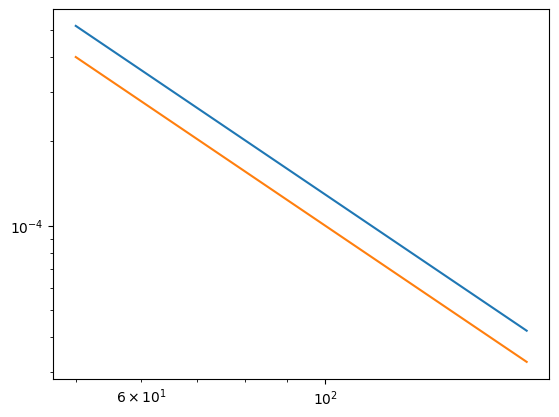

In [9]:
# Usual plot for EOC
plt.loglog(NN,k_array)
plt.loglog(NN,NN_inv) # sorry but problem with inverse on integers in new version of python
plt.show()

The line is parallel to ref. line, emaning theoreticall EOC is respected.

Point 2

Let's do teh same analysis, but this time with non uniform grid. Let's try in 1D by building the mesh using exponential spacing with parameter 0.72 (not too aggressive). 

In [12]:
FEM1D.unif_mesh(omega, 4)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

In [13]:
FEM1D.non_uniform_mesh(omega, 4, 0.72)

array([0.        , 1.15788834, 1.90725286, 2.55384175, 3.14159265])

Those are teh two grids, for a comparison.

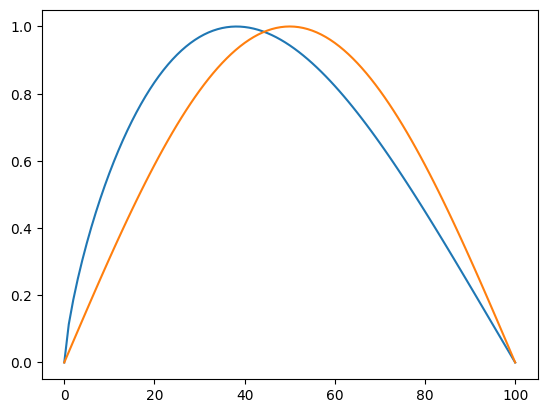

0.26493706763549035


In [20]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)
exact = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 1

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), False)
A, F = method.FEM_POISSON()

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Evaluate exact solution at grid nodes
x = np.linspace(omega[0],omega[1],N+1)
U = exact(x)

# Plot solutions
plt.plot(Uh)
plt.plot(U)
plt.show()


# compute discrete max norm error
print(max(abs(U-Uh)))

The choice of the non uniform grid, exponential spacing, it it not optimal since the result is not good as before.

In [16]:
# Initialise error vector
k_array = np.zeros(6)

# experiments loop
for i, N in enumerate(NN):

    n_qpoints = 10

    # call function computing FEM system
    method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
    A, F = method.FEM_POISSON()

    # solve
    Uh = sp.linalg.spsolve(A,F)

    k_array[i] = method.FEM1_H1(Uh, my_f, t)

C:\Users\matte\AppData\Local\Temp\ipykernel_12364\771132173.py:14: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


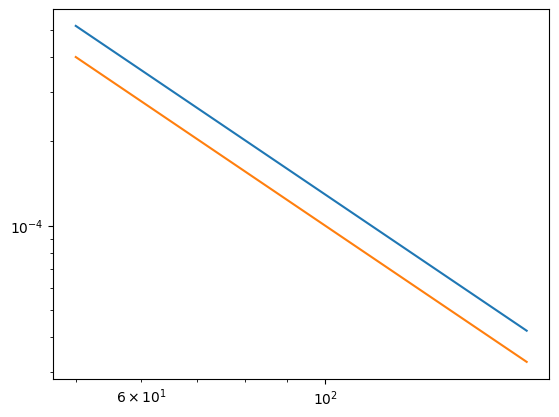

In [17]:
# Usual plot for EOC
plt.loglog(NN,k_array)
plt.loglog(NN,NN_inv) # sorry but problem with inverse on integers in new version of python
plt.show()

EOC respected.

Point 3

Solve general stationary reaction-advection-diffusion problems (Elliptic PDE)

$-a(x)u''(x)+b(x)u'(x)+c(x)u(x)=f$, with data same as before.

Let's set, for simplicity: $a = 2$, $b = 1$ and $c = 1$.

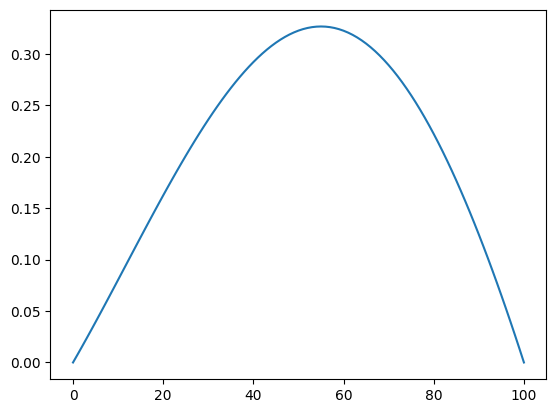

In [19]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 10

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
A, F = method.FEM_GEN(lambda x: 2, lambda x: 1, lambda x: 1)

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Plot solutions
plt.plot(Uh)
plt.show()